In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from sklearn.datasets import load_iris
iris = load_iris()

In [9]:
# Converting it into dataframe
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['Species'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


# Data pre-processing is not required in the iris dataset

# Find Important Columns (Features Selection)

In [12]:
featureset = df[["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]]
featureset.head()
y = df["Species"]

# KNN, SVM, Decision Tree, Logistic Regression

# KNN Model

# 70% of data for Training and 30% for Testing

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( featureset, y, test_size=0.3, random_state=4)
print ('Train set:', x_train.shape, y_train.shape)     # 105 rows for Training (70%)
print ('Test set:', x_test.shape, y_test.shape)       # 45 rows for Testing (30%)

Train set: (105, 4) (105,)
Test set: (45, 4) (45,)


In [14]:
from sklearn.neighbors import KNeighborsClassifier
k = 3
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=3)

# Plot the output with respect to any input

In [15]:
inp = [[5.1, 3.5, 1.4, 0.2]]
out = neigh.predict(inp)
print(out)

[0.]


# Accuracy

In [16]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, neigh.predict(x_test)))

Train set Accuracy:  0.9714285714285714
Test set Accuracy:  0.9777777777777777


# Performance

In [17]:
from sklearn.metrics import confusion_matrix
cnf_matrix1 = confusion_matrix(y_train,neigh.predict(x_train))
cnf_matrix2 = confusion_matrix(y_test,neigh.predict(x_test))
print(cnf_matrix1)
print(cnf_matrix2)
print("Performance (training data)= ", (29+38+35)/np.sum(cnf_matrix1))
print("Performance (testing data)= ", (21+9+14)/np.sum(cnf_matrix2))

[[29  0  0]
 [ 0 38  2]
 [ 0  1 35]]
[[21  0  0]
 [ 0  9  1]
 [ 0  0 14]]
Performance (training data)=  0.9714285714285714
Performance (testing data)=  0.9777777777777777


# SVM

In [18]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train) 

SVC(kernel='linear')

In [19]:
inp = [[5.1, 3.5, 1.4, 0.2]]
out = clf.predict(inp)
print(out)

[0.]


# Accuracy

In [81]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, clf.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, clf.predict(x_test)))

Train set Accuracy:  0.9809523809523809
Test set Accuracy:  0.9777777777777777


# Performance

In [82]:
from sklearn.metrics import confusion_matrix
cnf_matrix1 = confusion_matrix(y_train,clf.predict(x_train))
cnf_matrix2 = confusion_matrix(y_test,clf.predict(x_test))
print(cnf_matrix1)
print(cnf_matrix2)
print("Performance (training data)= ", (29+38+35)/np.sum(cnf_matrix1))
print("Performance (testing data)= ", (21+9+14)/np.sum(cnf_matrix2))

[[29  0  0]
 [ 0 38  2]
 [ 0  0 36]]
[[21  0  0]
 [ 0  9  1]
 [ 0  0 14]]
Performance (training data)=  0.9714285714285714
Performance (testing data)=  0.9777777777777777


# Decision Tree

[Text(697.5, 733.86, 'X[2] <= 2.45\nentropy = 1.573\nsamples = 105\nvalue = [29, 40, 36]'),
 Text(590.1923076923077, 570.78, 'entropy = 0.0\nsamples = 29\nvalue = [29, 0, 0]'),
 Text(804.8076923076923, 570.78, 'X[3] <= 1.75\nentropy = 0.998\nsamples = 76\nvalue = [0, 40, 36]'),
 Text(429.2307692307692, 407.70000000000005, 'X[2] <= 4.95\nentropy = 0.446\nsamples = 43\nvalue = [0, 39, 4]'),
 Text(214.6153846153846, 244.62, 'X[3] <= 1.65\nentropy = 0.172\nsamples = 39\nvalue = [0, 38, 1]'),
 Text(107.3076923076923, 81.54000000000008, 'entropy = 0.0\nsamples = 38\nvalue = [0, 38, 0]'),
 Text(321.9230769230769, 81.54000000000008, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(643.8461538461538, 244.62, 'X[3] <= 1.65\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(536.5384615384615, 81.54000000000008, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(751.1538461538462, 81.54000000000008, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(1180.3846153846155, 407.

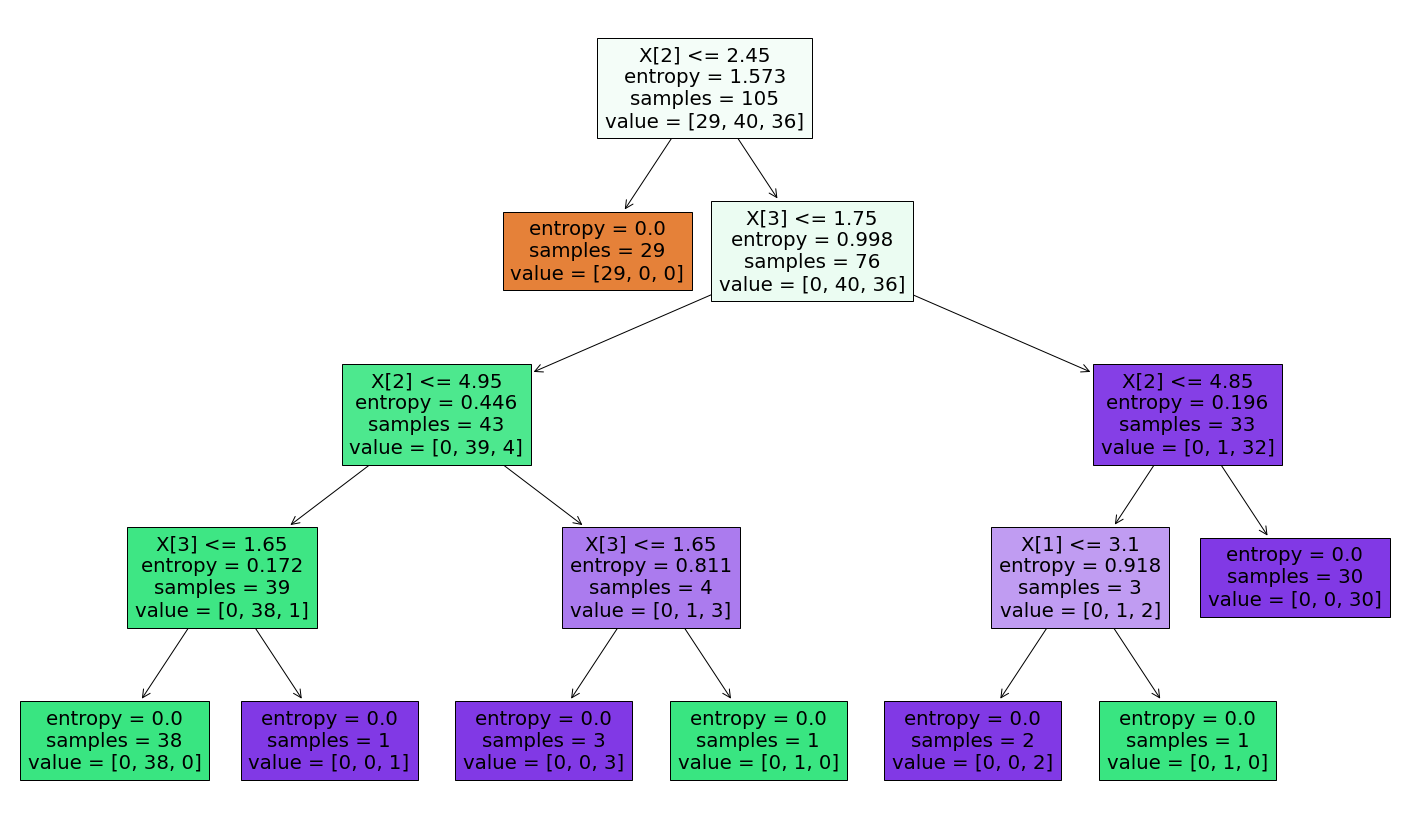

In [83]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
obj = DecisionTreeClassifier(criterion="entropy")
# Fit 
obj = obj.fit(x_train,y_train)
# Plot
plt.figure(figsize=(25,15))
tree.plot_tree(obj, filled = True)

In [84]:
inp = [[5.1, 3.5, 1.4, 0.2]]
out = obj.predict(inp)
print(out)

[0.]


# Accuracy

In [67]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, obj.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, obj.predict(x_test)))

Train set Accuracy:  1.0
Test set Accuracy:  0.9777777777777777


# Performance

In [69]:
from sklearn.metrics import confusion_matrix
cnf_matrix1 = confusion_matrix(y_train,obj.predict(x_train))
cnf_matrix2 = confusion_matrix(y_test,obj.predict(x_test))
print(cnf_matrix1)
print(cnf_matrix2)
print("Performance (training data)= ", (29+40+36)/np.sum(cnf_matrix1))
print("Performance (testing data)= ", (21+9+14)/np.sum(cnf_matrix2))

[[29  0  0]
 [ 0 40  0]
 [ 0  0 36]]
[[21  0  0]
 [ 0  9  1]
 [ 0  0 14]]
Performance (training data)=  1.0
Performance (testing data)=  0.9777777777777777


# Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter = 500).fit(x_train,y_train)
LR

LogisticRegression(max_iter=500)

# Plot the output with respect to any input

In [86]:
inp = [[5.1, 3.5, 1.4, 0.2]]
out = LR.predict(inp)
print(out)

[0.]


# Accuracy

In [72]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, LR.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, LR.predict(x_test)))

Train set Accuracy:  0.9809523809523809
Test set Accuracy:  0.9777777777777777


# Performance

In [74]:
from sklearn.metrics import confusion_matrix
cnf_matrix1 = confusion_matrix(y_train,LR.predict(x_train))
cnf_matrix2 = confusion_matrix(y_test,LR.predict(x_test))
print(cnf_matrix1)
print(cnf_matrix2)
print("Performance (training data)= ", (29+38+36)/np.sum(cnf_matrix1))
print("Performance (testing data)= ", (21+9+14)/np.sum(cnf_matrix2))

[[29  0  0]
 [ 0 38  2]
 [ 0  0 36]]
[[21  0  0]
 [ 0  9  1]
 [ 0  0 14]]
Performance (training data)=  0.9809523809523809
Performance (testing data)=  0.9777777777777777
